 # Лабораторная работа №4
 ## Вариант 19

$
y = \sqrt[3]x;
m_x = 1;
\sigma = \sqrt3;
y_0 = 0
$

In [1]:
from random import random
import numpy as np
from matplotlib import pyplot as plt
from math import floor, pow
from scipy import stats

a = -2
b = 4
alphas = [0.01, 0.05, 0.09, 0.2, 0.4, 0.5]
n_values = [30, 50, 70, 100, 150]

## Теоретическая плотность распределения

![](./analytical1.jpg)

In [2]:
def func(value):
    is_negative = value < 0
    result = pow(abs(value), 1 / 3)
    return -result if is_negative else result

borderA = func(a)
borderB = func(b)

def analytical_func_densiny(y):    
    if y >= borderA and y <= borderB:
        return (1 / 2) * pow(y, 2)
    return 0

def analytical_func_dist(y):    
    if y >= borderA and y <= borderB:
        return (1 / 6) * (pow(y, 3) - a)

    return 0 if y < borderA else 1

def get_eps():
    return random()

def get_x_sample(a, b, n):
    result = []
    for i in range(n):
        x = get_eps() * (b - a) + a
        result.append(x)
    return result

def get_y_sample(x_sample):
    result = []
    for x in x_sample:
        result.append(func(x))
    return sorted(result)

## Нахождение теоритического математического ожидания и дисперсии
![](./theory.jpg)

In [3]:
D = 1.09626
M = 0.4787

## Доверительный интервал для математического ожидания

In [4]:
def get_confidence_m(d, m, count):
    fracs = []
    gammas = []
    for alpha in alphas:
        gamma = 1 - alpha
        gammas.append(gamma)

        frac = (d * stats.t.ppf(gamma, count - 1)) / pow(count - 1, 1 / 2)
        fracs.append(2 * frac)
        
        left = round(m - frac, 5)
        right =  round(m + frac, 5)
    return gammas, fracs

def confidence_interval_m(count):
    # Задание 1
    x_sample = get_x_sample(a, b, count)
    y_sample = get_y_sample(x_sample)

    print('-' * 24 + 'START' + '-' * 24 + '\n')
    print('Выборка размером: %i\n' % count)

    print('Теоретическое МО: %f' % M)
    print('Теоретическая дисперсия: %f' % D)

    # 1. Точечная оценка МО
    m_estimate = 0
    for i in y_sample:
        m_estimate += i
    m_estimate /= count
    print('Точечная оценка МО: %f' % m_estimate)

    # 2. Точечная несмещенная оценка дисперсии
    d_estimate = 0
    for i in y_sample:
        d_estimate += pow(i - m_estimate, 2)
    d_estimate *= 1 / (count - 1)
    print('Точечная несмещенная оценка дисперсии: %f' % d_estimate)

    # 3. Доверительный интервал для оценки математического ожидания
    empiric_gammas, empiric_fracs = get_confidence_m(d_estimate, m_estimate, count)

    # 4. График зависимости величины доверительного интервала от уровня значимости
    plt.plot(empiric_gammas, empiric_fracs, label="[empiric] size from level dependency")
    plt.legend()
    plt.show()

    # 6. Доверительный интервал для оценки математического ожидания по теоретической дисперсии
    theory_gammas, theory_fracs = get_confidence_m(D, m_estimate, count)

    # 7. График зависимости величины доверительного интервала от уровня значимости по теоретической дисперсии
    plt.plot(theory_gammas, theory_fracs, label="[theory] size from level dependency")
    plt.legend()
    plt.show()

    # 8. Сравнение интервалов при эмперической и теоретической дисперсии
    plt.plot(empiric_gammas, empiric_fracs, label="empiric dispersion")
    plt.plot(theory_gammas, theory_fracs, label="theory dispersion")
    plt.legend()
    plt.show()
    print('\n' + '-' * 25 + 'END' + '-' * 25 + '\n')
    return empiric_fracs[0], theory_fracs[0]




------------------------START------------------------

Выборка размером: 30

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.633080
Точечная несмещенная оценка дисперсии: 1.090989
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.134300, 1.131860]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.288850, 0.977310]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.354740, 0.911420]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.460030, 0.806130]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.581280, 0.684880]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.633080, 0.633080]


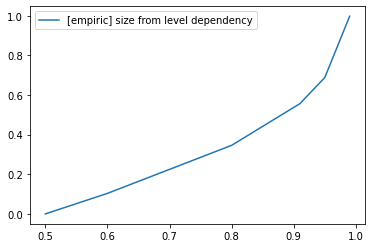

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.131890, 1.134270]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.287190, 0.978970]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.353390, 0.912770]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.459190, 0.806970]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.581030, 0.685130]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.633080, 0.633080]


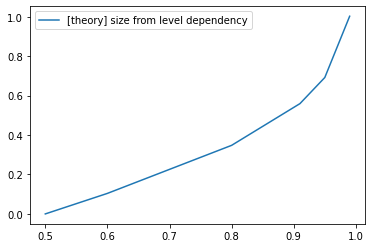

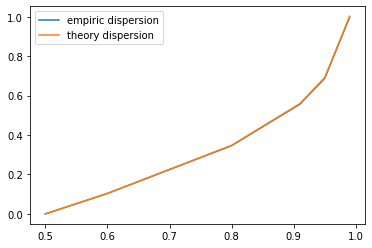


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 50

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.615729
Точечная несмещенная оценка дисперсии: 1.048221
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.255610, 0.975850]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.364670, 0.866790]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.412050, 0.819410]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.488590, 0.742870]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.577580, 0.653870]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.615730, 0.615730]


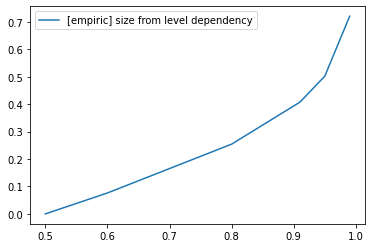

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.239100, 0.992360]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.353170, 0.878290]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.402710, 0.828740]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.482770, 0.748690]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.575840, 0.655620]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.615730, 0.615730]


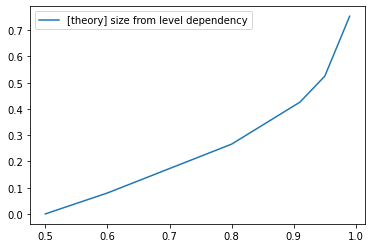

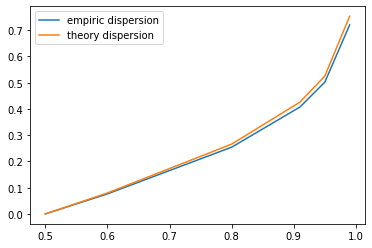


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 70

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.342911
Точечная несмещенная оценка дисперсии: 1.180665
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.004400, 0.681420]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.105940, 0.579880]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.150390, 0.535430]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.222540, 0.463280]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.306760, 0.379060]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.342910, 0.342910]


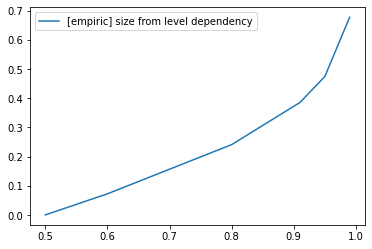

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.028600, 0.657220]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.122880, 0.562940]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.164150, 0.521670]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.231150, 0.454680]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.309350, 0.376480]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.342910, 0.342910]


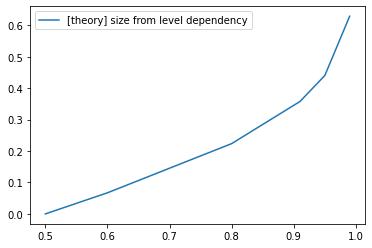

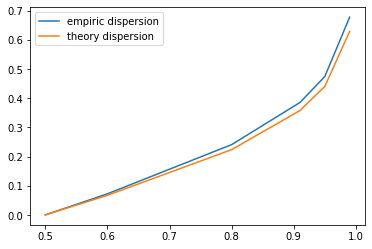


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 100

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.491768
Точечная несмещенная оценка дисперсии: 1.036920
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.245340, 0.738190]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.318730, 0.664800]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.351050, 0.632490]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.403680, 0.579860]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.465290, 0.518240]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.491770, 0.491770]


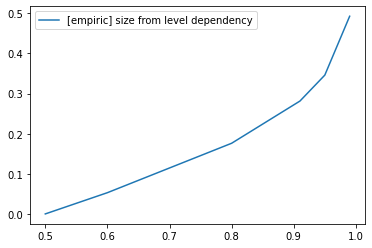

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.231240, 0.752300]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.308830, 0.674710]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.342990, 0.640540]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.398640, 0.584900]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.463780, 0.519760]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.491770, 0.491770]


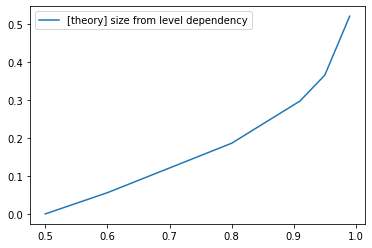

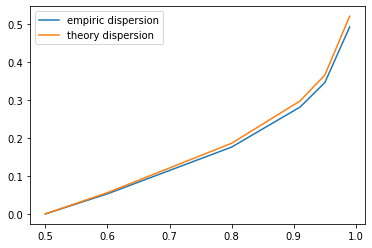


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 150

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.650535
Точечная несмещенная оценка дисперсии: 0.947910
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.467920, 0.833150]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.522000, 0.779070]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.545930, 0.755140]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.584990, 0.716080]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.630830, 0.670240]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.650530, 0.650530]


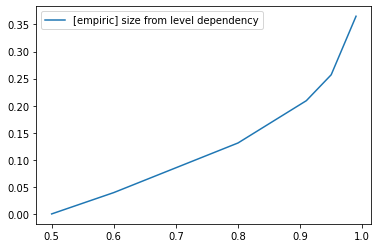

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.439340, 0.861730]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.501890, 0.799180]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.529550, 0.771510]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.574730, 0.726340]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.627740, 0.673330]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.650530, 0.650530]


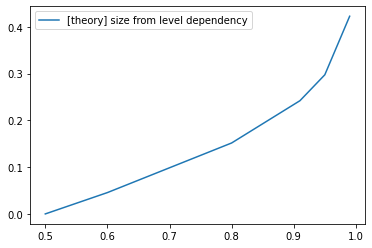

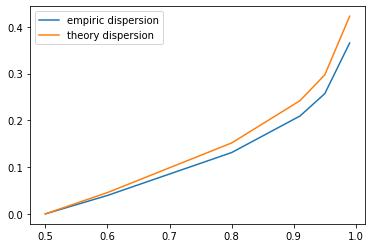


-------------------------END-------------------------



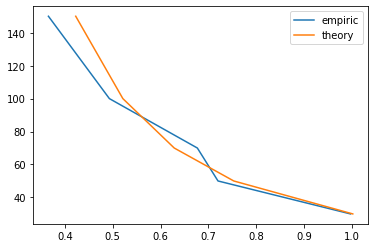

In [10]:
# 9. Пункты 2 - 8 с различным обьемом выборки
m_e_fracs = []
m_t_fracs = []
for i in n_values:
    e, t = confidence_interval_m(i)
    m_e_fracs.append(e)
    m_t_fracs.append(t)

# 10. График зависимости величины доверительного интервала от объема выборки
plt.plot(m_e_fracs, n_values, label="empiric")
plt.plot(m_t_fracs, n_values, label="theory")
plt.legend()
plt.show()

## Доверительный интервал для дисперсии

In [7]:
def get_confidence_d(d, count):
    fracs = []
    gammas = []
    for alpha in alphas:
        gamma = 1 - alpha
        gammas.append(gamma)

        fracLeft = count * d / stats.chi2.ppf((1 + gamma) / 2.0, count - 1)
        fracRight = count * d / stats.chi2.ppf((1 - gamma) / 2.0, count - 1)
        fracs.append(abs(fracRight - fracLeft))
    return gammas, fracs

def confidence_interval_d(count):
    # Задание 2
    x_sample = get_x_sample(a, b, count)
    y_sample = get_y_sample(x_sample)

    print('-' * 24 + 'START' + '-' * 24 + '\n')
    print('Выборка размером: %i\n' % count)

    print('Теоретическое МО: %f' % M)
    print('Теоретическая дисперсия: %f' % D)


    # 2. Точечная оценка МО
    m_estimate = 0
    for i in y_sample:
        m_estimate += i
    m_estimate /= count
    print('Точечная оценка МО: %f' % m_estimate)

    # 1. Точечная несмещенная оценка дисперсии
    d_estimate = 0
    for i in y_sample:
        d_estimate += pow(i - m_estimate, 2)
    d_estimate *= 1 / (count - 1)
    print('Точечная несмещенная оценка дисперсии: %f' % d_estimate)


    # 3. Доверительный интервал для оценки дисперсии    
    empiric_gammas, empiric_fracs = get_confidence_d(d_estimate, count)

    # 4. График зависимости величины доверительного интервала от уровня значимости
    plt.plot(empiric_gammas, empiric_fracs, label="[empiric] size from level dependency")
    plt.legend()
    plt.show()

    # 6. Доверительный интервал для оценки дисперсии по теоретическому математическому ожиданию
    d_mo_theory = 0
    for i in y_sample:
        d_mo_theory += pow(i - m_estimate, 2)
    d_mo_theory *= 1 / (count - 1)

    theory_gammas, theory_fracs = get_confidence_d(d_mo_theory, count)

    # 7. График зависимости величины доверительного интервала от уровня значимости по теоретическому матемотическому ожиданию
    plt.plot(theory_gammas, theory_fracs, label="[theory] size from level dependency")
    plt.legend()
    plt.show()

    # 8. Сравнение интервалов при эмперическому и теоретическому математическому
    plt.plot(empiric_gammas, empiric_fracs, label="empiric dispersion")
    plt.plot(theory_gammas, theory_fracs, label="theory dispersion")
    plt.legend()
    plt.show()
    print('\n' + '-' * 25 + 'END' + '-' * 25 + '\n')
    return empiric_fracs[0], theory_fracs[0]

------------------------START------------------------

Выборка размером: 30

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.389055
Точечная несмещенная оценка дисперсии: 1.186146
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.679927, 2.711986]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.778272, 2.217500]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.826489, 2.041069]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.910378, 1.800123]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [1.012664, 1.583283]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [1.055574, 1.509950]


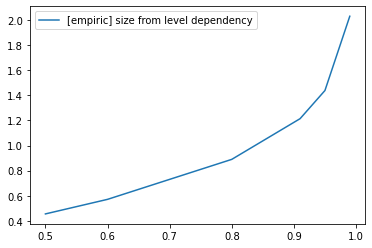

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.679927, 2.711986]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.778272, 2.217500]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.826489, 2.041069]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.910378, 1.800123]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [1.012664, 1.583283]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [1.055574, 1.509950]


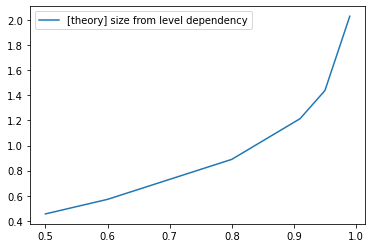

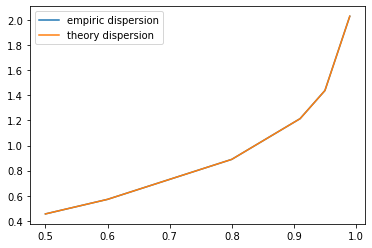


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 50

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.611492
Точечная несмещенная оценка дисперсии: 1.002921
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.641002, 1.840266]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.714103, 1.589168]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.748985, 1.495055]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.808318, 1.361990]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.878543, 1.237123]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.907369, 1.193658]


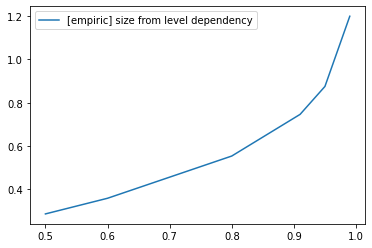

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.641002, 1.840266]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.714103, 1.589168]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.748985, 1.495055]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.808318, 1.361990]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.878543, 1.237123]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [0.907369, 1.193658]


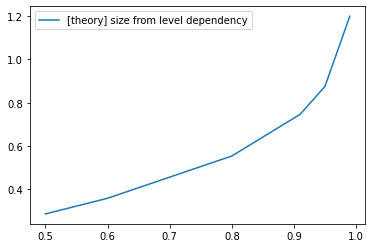

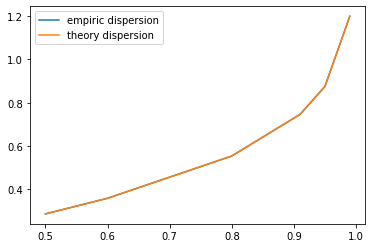


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 70

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.419286
Точечная несмещенная оценка дисперсии: 1.202083
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.816980, 1.980203]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.896537, 1.755812]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.933937, 1.669657]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.996777, 1.545715]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [1.069973, 1.426936]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [1.099670, 1.384983]


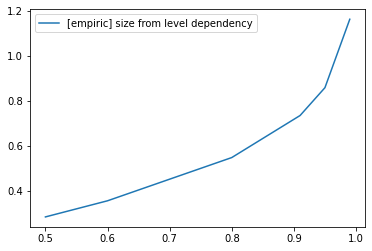

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.816980, 1.980203]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.896537, 1.755812]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.933937, 1.669657]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.996777, 1.545715]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [1.069973, 1.426936]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [1.099670, 1.384983]


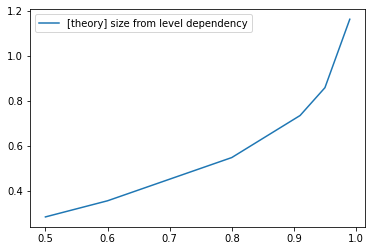

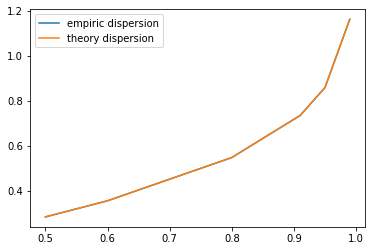


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 100

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.531982
Точечная несмещенная оценка дисперсии: 1.099373
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.790991, 1.652941]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.856063, 1.498577]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.886238, 1.438086]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.936378, 1.349764]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.993946, 1.263571]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [1.017059, 1.232740]


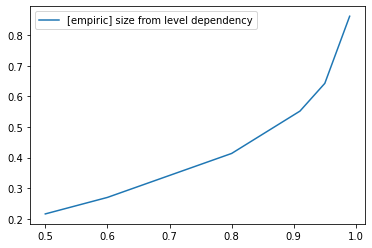

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.790991, 1.652941]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.856063, 1.498577]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.886238, 1.438086]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.936378, 1.349764]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [0.993946, 1.263571]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [1.017059, 1.232740]


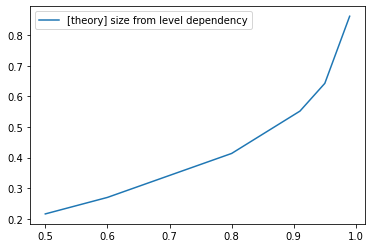

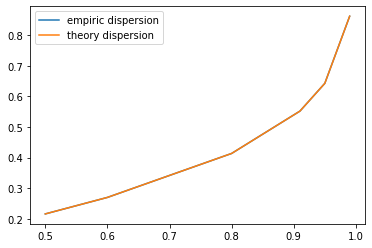


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 150

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.469967
Точечная несмещенная оценка дисперсии: 1.141621
Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.868324, 1.581321]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.927207, 1.462392]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.954156, 1.414923]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.998462, 1.344672]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [1.048639, 1.274971]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [1.068586, 1.249749]


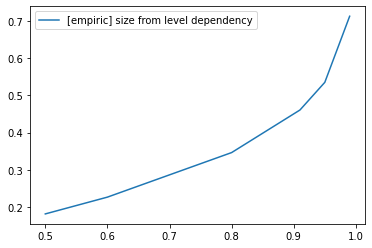

Уровень значимости: 0.990000 (a=0.010000); Интервал: [0.868324, 1.581321]
Уровень значимости: 0.950000 (a=0.050000); Интервал: [0.927207, 1.462392]
Уровень значимости: 0.910000 (a=0.090000); Интервал: [0.954156, 1.414923]
Уровень значимости: 0.800000 (a=0.200000); Интервал: [0.998462, 1.344672]
Уровень значимости: 0.600000 (a=0.400000); Интервал: [1.048639, 1.274971]
Уровень значимости: 0.500000 (a=0.500000); Интервал: [1.068586, 1.249749]


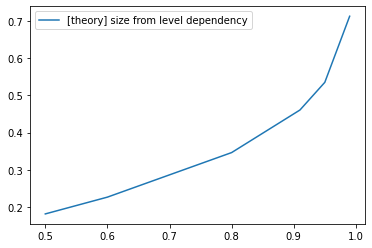

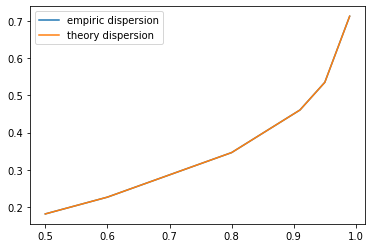


-------------------------END-------------------------



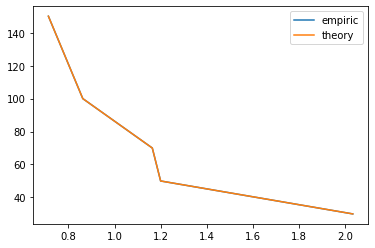

In [9]:
# 9. Пункты 2 - 8 с различным обьемом выборки
d_e_fracs = []
d_t_fracs = []
for i in n_values:
    e, t = confidence_interval_d(i)
    d_e_fracs.append(e)
    d_t_fracs.append(t)

# 10. График зависимости величины доверительного интервала от объема выборки
plt.plot(d_e_fracs, n_values, label="empiric")
plt.plot(d_t_fracs, n_values, label="theory")
plt.legend()
plt.show()